In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

filename = '/content/drive/MyDrive/1CodingDojo/Week2/sales_predictions.csv'

df = pd.read_csv(filename, index_col='Item_Identifier')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


In [4]:
df['Outlet_Size'] = df.loc[:, 'Outlet_Size'].fillna(method='bfill')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df = df.dropna(how = 'any')

In [6]:
df.groupby('Item_Type')[['Item_MRP']].sum()

,Item_MRP
Item_Type,
Baking Goods,67588.1130
Breads,28663.1848
Breakfast,12696.1874
Canned,75052.9980
Dairy,84526.4948
Frozen Foods,99961.8818
Fruits and Vegetables,147188.9632
Hard Drinks,25261.6174
Health and Hygiene,56383.8020


In [7]:
df.groupby('Item_Type')[['Item_Fat_Content']].count()

,Item_Fat_Content
Item_Type,
Baking Goods,536
Breads,204
Breakfast,89
Canned,539
Dairy,566
Frozen Foods,718
Fruits and Vegetables,1019
Hard Drinks,183
Health and Hygiene,430


In [8]:
df.groupby('Item_Type')[['Item_Outlet_Sales']].sum()

,Item_Outlet_Sales
Item_Type,
Baking Goods,1.027220e+06
Breads,4.377708e+05
Breakfast,1.781042e+05
Canned,1.155262e+06
Dairy,1.244133e+06
Frozen Foods,1.494210e+06
Fruits and Vegetables,2.219978e+06
Hard Drinks,3.770672e+05
Health and Hygiene,8.351709e+05


In [9]:
df['Item_Weight'] = df['Item_Weight'].fillna(method='bfill')
df.groupby('Item_Type')[['Item_Weight']].sum()

,Item_Weight
Item_Type,
Baking Goods,6580.530
Breads,2314.775
Breakfast,1136.370
Canned,6632.775
Dairy,7599.155
Frozen Foods,9238.550
Fruits and Vegetables,13476.040
Hard Drinks,2086.260
Health and Hygiene,5651.195


In [10]:
x1 = list(df['Item_Type'].unique())
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat').replace('LF', 'Low Fat').replace('reg', 'Regular')
y1 = list(df.groupby('Item_Type')[['Item_Fat_Content']].count()['Item_Fat_Content'])

In [11]:
y2 = list(df.groupby('Item_Type')[['Item_Outlet_Sales']].sum()['Item_Outlet_Sales'])

In [12]:
y3 = list(df.groupby('Item_Type')[['Item_Weight']].sum()['Item_Weight'])

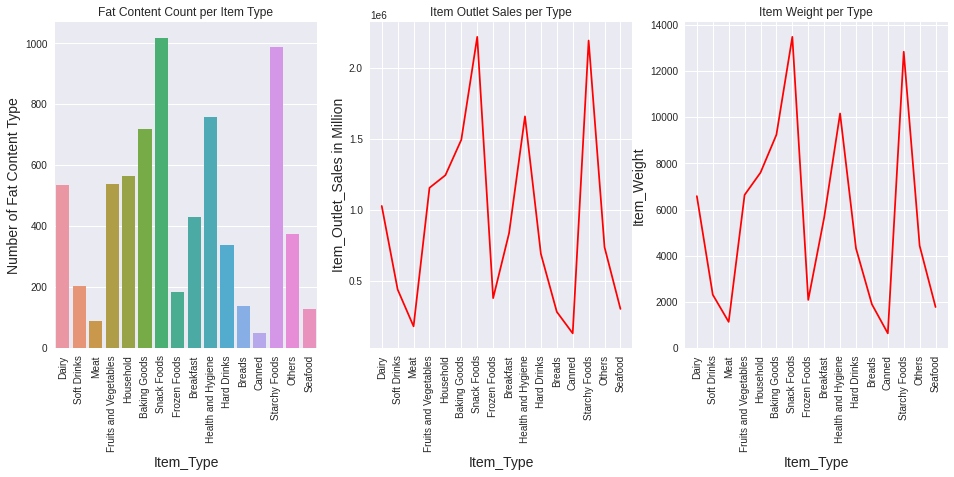

In [13]:
plt.figure(figsize=(16,6))
plt.style.use('seaborn')
# Subplot 1 
plt.subplot(1, 3, 1);
# plt.plot(x1, y1, c = 'r');
sns.barplot(x = x1, y = y1);
plt.xticks(rotation = 90)
plt.title('Fat Content Count per Item Type', fontsize = 12);
plt.xlabel('Item_Type', fontsize=14);
plt.ylabel('Number of Fat Content Type', fontsize=14);

# Subplot 2
plt.subplot(1, 3, 2);
plt.plot(x1, y2, c = 'r');
plt.xticks(rotation = 90)
plt.xlabel('Item_Type', fontsize=14);
plt.ylabel('Item_Outlet_Sales in Million', fontsize=14);
plt.title('Item Outlet Sales per Type', fontsize = 12);

# Subplot 3
plt.subplot(1, 3, 3);
plt.plot(x1, y3, c = 'r');
plt.xticks(rotation = 90)
plt.xlabel('Item_Type', fontsize=14);
plt.ylabel('Item_Weight', fontsize=14);
plt.title('Item Weight per Type', fontsize = 12);


Snack Foods has the more Fat Content Type, Higher sales rates.

In [14]:
df.groupby('Outlet_Establishment_Year')[['Outlet_Identifier']].count()

,Outlet_Identifier
Outlet_Establishment_Year,
1987,932
1997,930
1998,555
1999,930
2002,929
2004,930
2007,926
2009,928


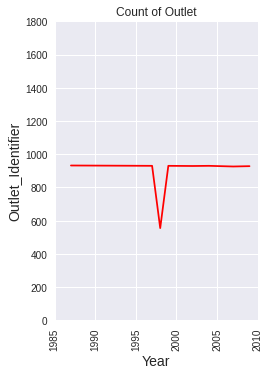

In [15]:
dy = df.groupby('Outlet_Establishment_Year')[['Outlet_Identifier']].count()
year = df['Outlet_Establishment_Year'].sort_values().unique()
outlet = list(dy['Outlet_Identifier'])

plt.style.use('seaborn')
# Subplot 2
plt.subplot(1, 2, 2);
plt.plot(year, outlet, c = 'r');
plt.xticks(rotation = 90)
plt.xlabel('Year', fontsize=14);
plt.ylabel('Outlet_Identifier', fontsize=14);
plt.xlim(left=1985,right=2010)
plt.ylim(bottom=0,top=1800)

plt.title('Count of Outlet', fontsize = 12);


In [16]:
df.groupby('Item_Type')['Item_Visibility'].mean()

Item_Type
Baking Goods             0.066807
Breads                   0.064834
Breakfast                0.081250
Canned                   0.067316
Dairy                    0.069207
Frozen Foods             0.063955
Fruits and Vegetables    0.065985
Hard Drinks              0.064988
Health and Hygiene       0.054000
Household                0.059113
Meat                     0.059300
Others                   0.056643
Seafood                  0.069714
Snack Foods              0.064351
Soft Drinks              0.061290
Starchy Foods            0.068639
Name: Item_Visibility, dtype: float64

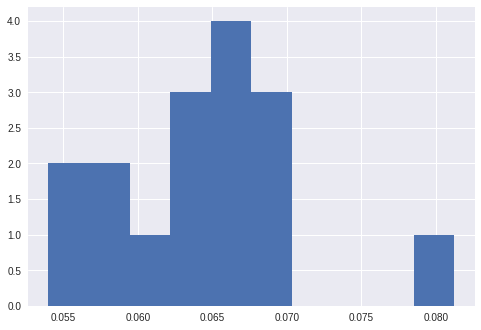

In [17]:
df.groupby('Item_Type')['Item_Visibility'].mean().hist();

In [18]:
df.groupby('Outlet_Type')[['Item_Outlet_Sales']].sum()

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,1.883402e+05
Supermarket Type1,1.291734e+07
Supermarket Type2,1.851823e+06


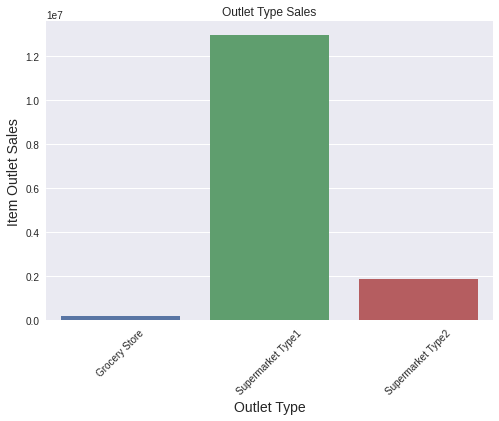

In [19]:
outlet_type = list(df['Outlet_Type'].sort_values().unique())
outlet_sales = list(df.groupby('Outlet_Type')[['Item_Outlet_Sales']].sum()['Item_Outlet_Sales'])

sns.barplot(x = outlet_type, y = outlet_sales);
plt.xticks(rotation = 45)
plt.title('Outlet Type Sales', fontsize = 12);
plt.xlabel('Outlet Type', fontsize=14);
plt.ylabel('Item Outlet Sales', fontsize=14);

Supermarket Type1 sells more items than other stores and supermarkets.

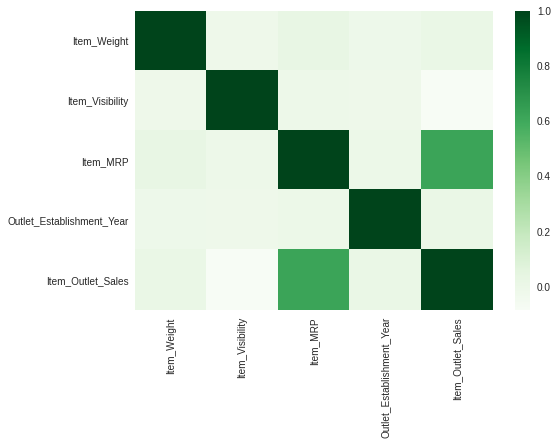

In [20]:
corr = df.corr()

import seaborn as sns
sns.heatmap(corr, cmap = 'Greens');

In [21]:
# For scaling data
from sklearn.linear_model import LinearRegression

In [22]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat').replace('LF', 'Low Fat').replace('reg', 'Regular')
item_fat_content = pd.get_dummies(df['Item_Fat_Content'])
outlet_location_type = pd.get_dummies(df['Outlet_Location_Type'])
outlet_type = pd.get_dummies(df['Outlet_Type'])
outlet_size = pd.get_dummies(df['Outlet_Size'])
outlet_identifier = pd.get_dummies(df['Outlet_Identifier'])

In [23]:
# Dummy Coding Scheme

cols = [ 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales' ]
df = pd.concat([df[cols], item_fat_content, outlet_size, outlet_location_type, outlet_type, outlet_identifier], axis=1)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Low Fat,Regular,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,OUT010,OUT013,OUT017,OUT018,OUT035,OUT045,OUT046,OUT049
Item_Identifier,,,,,,,,,,,,,,,,,,,,,,,
FDA15,9.30,0.016047,249.8092,3735.1380,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
DRC01,5.92,0.019278,48.2692,443.4228,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
FDN15,17.50,0.016760,141.6180,2097.2700,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
FDX07,19.20,0.000000,182.0950,732.3800,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
NCD19,8.93,0.000000,53.8614,994.7052,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0


In [24]:
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].round(2)
df['Item_MRP'] = df['Item_MRP'].round(2)

In [25]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Low Fat,Regular,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,OUT010,OUT013,OUT017,OUT018,OUT035,OUT045,OUT046,OUT049
Item_Identifier,,,,,,,,,,,,,,,,,,,,,,,
FDA15,9.30,0.016047,249.81,3735.14,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
DRC01,5.92,0.019278,48.27,443.42,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
FDN15,17.50,0.016760,141.62,2097.27,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
FDX07,19.20,0.000000,182.10,732.38,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
NCD19,8.93,0.000000,53.86,994.71,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0


In [26]:
# Combined, (Outlet_Type, Outlet_Size, Outlet_Location_Type)
y = df['Item_Outlet_Sales']
X = df.drop(columns=['Item_Outlet_Sales'])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [28]:
# Make a linear regression instance
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# or to predict all values on the training data
train_preds = reg.predict(X_train)
# predict the values in the test set
test_preds = reg.predict(X_test)

In [30]:
# Measuring Model Performance
ln_train_score = reg.score(X_train, y_train)
print(ln_train_score)

0.49894180306217045


In [32]:
ln_test_score = reg.score(X_test, y_test)
print(ln_test_score)

0.52884105908702


In [35]:
from sklearn.metrics import r2_score
ln_r2square = r2_score(y_train, train_preds)
ln_r2square

0.4989418030621704

In [70]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_train, train_preds)

rmse = math.sqrt(mse)

print(rmse)

1078.4209308749143


**simple decision tree**

In [36]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 42)

In [37]:
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [71]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [39]:
# evaluate the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.0817468837963321


In [40]:
dtree_r2square = r2_score(y_train, train_preds)
dtree_r2square

1.0

In [72]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_train, train_preds)

rmse = math.sqrt(mse)

print(rmse)

0.0


**Bagged tree model**

In [41]:
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(random_state = 42)

In [42]:
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [56]:
bpreds = bagreg.predict(X_train)
btpreds = bagreg.predict(X_test)

In [57]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.899301358460872
0.47103380030628994


In [58]:
breg_r2square = r2_score(y_train, bpreds)
breg_r2square

0.899301358460872

In [73]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_train, bpreds)

rmse = math.sqrt(mse)

print(rmse)

483.4549694161428


**Random forest model**

In [47]:
from sklearn.ensemble import RandomForestRegressor
sales_rf = RandomForestRegressor(random_state = 42)

In [48]:
sales_rf.fit(X_train, y_train)
sales_rf.predict(X_test)

array([1609.7583, 1904.8006, 1681.2175, ...,  507.4594, 3521.0358,
       2998.1577])

In [52]:
sales_rf_predict = sales_rf.predict(X_train)

In [49]:
rf_train_score = sales_rf.score(X_train, y_train)
rf_test_score = sales_rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9254109024057993
0.5044866359708848


In [50]:
# outlet_type = list(df['Outlet_Type'].sort_values().unique())
RF = ['Train','Test'
]
score = [rf_train_score, rf_test_score]

In [55]:
rf_r2square = r2_score(y_train, sales_rf_predict)
rf_r2square

0.9254109024057993

In [74]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_train, sales_rf_predict)

rmse = math.sqrt(mse)

print(rmse)

416.084846358804


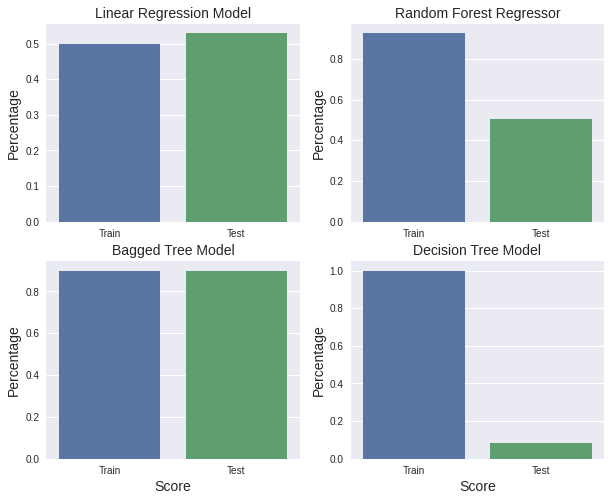

In [75]:
plt.figure(figsize=(10,8))
plt.style.use('seaborn')

# Subplot 1
plt.subplot(2, 2, 1);
sns.barplot(x = ['Train', 'Test'], y = [ln_train_score, ln_test_score]);
# plt.xlabel('Score', fontsize=14);
plt.ylabel('Percentage', fontsize=14);
plt.title('Linear Regression Model', fontsize = 14);

# Subplot 2 
plt.subplot(2, 2, 2);
# plt.plot(x1, y1, c = 'r');
sns.barplot(x = RF, y = score);
plt.title('Random Forest Regressor', fontsize = 14);
# plt.xlabel('Score', fontsize=14);
plt.ylabel('Percentage', fontsize=14);

BR = [bagreg_train_score, bagreg_train_score]
# Subplot 3
plt.subplot(2, 2, 3);
sns.barplot(x = ['Train', 'Test'] , y = BR);
plt.xlabel('Score', fontsize=14);
plt.ylabel('Percentage', fontsize=14);
plt.title('Bagged Tree Model', fontsize = 14);

# Subplot 4
plt.subplot(2, 2, 4);
sns.barplot(x = ['Train', 'Test'], y = [train_score, test_score]);
plt.xlabel('Score', fontsize=14);
plt.ylabel('Percentage', fontsize=14);
plt.title('Decision Tree Model', fontsize = 14);